# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2020/21)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 31.12.2020


### Dritter Vorlesungsteil:  
### Ausbreitung eines Virus auf einem komplexen Netzwerk
#### Das deterministische SIR Modell


## Einführung

Die Ausbreitung eines Krankheitserregers (z.B. Covid-19 Virus), eines Computervirus im Internet oder eines Gerüchts ("Fake-News") in einem sozialen Netzwerk hängt von dem Übertragungsmechanismus, der Struktur des zugrundeliegenden komplexen Netzwerkes und von dem Verhalten der Überträger (Knoten, Spieler, Agenten) ab. 

Das Kapitel 10 (Ausbreitungsphänomene) im Online-Buch 'Network Science' von Albert-Laszlo Barabasi (siehe <A href="http://networksciencebook.com/chapter/10" target=blank>Chapter 10: Spreading phenomena</A>) gibt einen guten Überblick über diesen Wissenschaftsbereich. Es werden mehrere analytische Epidemie-Modelle, wie das 'Susceptible-Infected (SI)' und das 'Susceptible-Infected-Susceptible (SIS)' Modell im Detail besprochen. Im Folgenden werden wir ein Modell (das Susceptible-Infected-Recovered (SIR) Modell) aus der Epidemiologie betrachten, welches die Ausbreitung von Viren in einem einfachen analytischen Modell beschreibt. Das zugrundeliegende Netzwerk in diesem Modell besteht aus einer Population von Personen (Knoten des Netzwerkes) und ist auf den folgenden grundlegenden Hypothesen begründet:

<ul>
   <li><b>Klassifizierung der Knoten in S,I,R</b></li>
    Jedes Individuum der Population befindet sich zu jedem Zeitpunkt in einer von drei unterschiedlichen Zuständen: Susceptible (S: Gesunde Personen, die mit dem Virus noch keinen Kontakt hatten und somit empfänglich sind), Infected (I: Infizierte Personen, die mit dem Virus Kontakt hatten und andere anstecken können) und Recovered (R: Personen, die infiziert waren aber nicht mehr infektiös sind und sich von der Krankheit erholt haben). 
   <li><b>Homogene Massenwirkungsnäherung</b></li>
    Jedes Individuum hat die gleiche Chance mit einem infizierten Individuum in Kontakt zu kommen. Mittels dieser Näherung beseitigt man die Notwendigkeit, das genaue Kontaktnetzwerk zu kennen, auf dem sich der Virus ausbreitet. Diese Annahme ist der Bedingung der klassischen evolutionären Spieltheorie ähnlich, bei der jeder Spieler mit jedem anderen Spieler das zugrundeliegende Spiel spielen kann. In der Realität ist diese Annahme nicht erfüllt, da einige Personen viele Kontakte und andere weniger Kontakte haben. Auch gilt die Zeitunabhängigkeit nicht, da der Staat durch Kontakt-Limitationen ("Lock Down") auf das Verhalten der Individuen in der akuten Corona-Krise eingriff.
</ul>

Nehmen wir an, dass ein typisches Individuum im Durchschnitt $<\!\!k\!\!>$ Kontakte hat und dass die Wahrscheinlichkeit, dass die Krankheit in einer Zeiteinheit $\Delta t$ von einem Infizierten auf eine andere Person übertragen wird, mittels des Parameters $\beta$ quantifiziert ist. Zusätzlich können sich infizierte Personen mit einer Wahrscheinlichkeit $\mu$ von der Krankheit erholen/sterben. Die genesenen ("Recovered") Personen betrachten wir zunächst als nicht mehr infizierbar (immun) und nehmen zusätzlich an, dass sie auch keine Anderen infizieren können. Wir fügen dieser Personengruppe auch die Personen hinzu, die an dem Virus gestorben sind (Removed). Die Wahrscheinlichkeit $\mu$ der in der Zeiteinheit $\Delta t$ aus dem System herausgenommenen Personen ergibt sich somit zu $\mu=\mu_{Reco}+\mu_{Dead}$.

Wir betrachten im Folgenden eine Population aus N Personen. Das dem oben beschriebenen SIR-Modell zugrundeliegende System von Differentialgleichungen lautet:

$$
\begin{eqnarray}
\frac{d s(t)}{dt} &=& -\underbrace{\beta <\!\!k\!\!> i(t) \cdot \underbrace{\left( 1 - r(t) - i(t) \right)}_{\hbox{s(t)}}}_{\hbox{pro $\Delta t$ neu Infizierte}}  \\
\frac{d i(t)}{dt} &=& -\underbrace{\mu \,i(t)}_{\hbox{pro $\Delta t$ Genesene und Gestorbene}} + \underbrace{\beta <\!\!k\!\!> i(t) \cdot \underbrace{\left( 1 - r(t) - i(t) \right)}_{\hbox{s(t)}}}_{\hbox{pro $\Delta t$ neu Infizierte}} \\
\frac{d r(t)}{dt} &=&  \underbrace{\mu \,i(t)}_{\hbox{pro $\Delta t$ Genesene und Gestorbene}} \quad ,
\end{eqnarray}
$$
wobei $s(t)=\frac{S(t)}{N}$ der Anteil der noch nicht erkrankten Personen, $i(t)=\frac{I(t)}{N}$ der Anteil der infizierten Personen und $r(t)=\frac{R(t)}{N}$ der Anteil der genesenen und gestorbenen Personen darstellt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy import integrate

Wir definieren die der Differentialgleichung zugrundeliegenden Funktionen:

In [2]:
def DGLs(s,i,r,beta,mu,k):
    fs = -beta*k*i*s
    return fs
def DGLi(s,i,r,beta,mu,k):
    fi = -mu*i + beta*k*i*s
    return fi
def DGLr(s,i,r,beta,mu,k):
    fr = +mu*i
    return fr

Definition des Systems der Differentialgleichungen:

In [3]:
def DGLsys(vx,t):
    s, i, r = vx
    dsdt = DGLs(s,i,r,beta,mu,k)
    didt = DGLi(s,i,r,beta,mu,k)
    drdt = DGLr(s,i,r,beta,mu,k)
    return np.array([dsdt,didt,drdt])

Wir lösen das System der Differentialgleichungen, wobei wir die folgenden hypothetischen Grundannahmen machen: Durchschnittliche Anzahl der Kontakte der Individuen $<\!\!k\!\!>=8$, $\beta=0.2$ und $\mu=0.1$.

Durch die Festlegung dieser Parameter des Modells ist auch eine weitere wichtige epidemiologische Größe festgelegt, die sogenannte Basisreproduktionszahl $R_0:=\frac{\beta\, <k>}{\mu}=16$. Sie besagt, wie viele Personen von einer infektiösen Person im durchschnittlich angesteckt werden, wenn sich die Population in einem Zustand aus nur noch nicht erkrankten Personen zusammensetzt.

In [4]:
N=10000
beta,mu=0.2,0.1
k=8
print("R0=",beta*k/mu)
tend=30

tval = np.linspace(0, tend, 1001)
s0=(N-1)/N
i0=1/N
r0=0
initialval = np.array([s0,i0,r0])
Loes = integrate.odeint(DGLsys, initialval, tval)

R0= 16.0


In [5]:
params = {
    'figure.figsize'    : [8,5],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

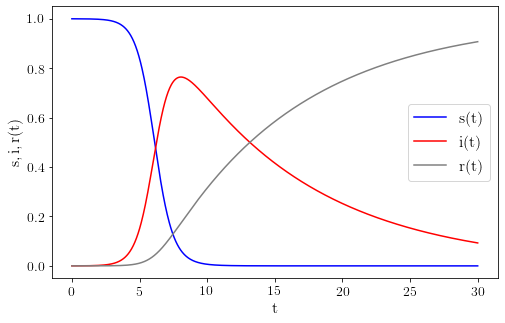

In [6]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm s,i,r(t)$")
plt.plot(tval, Loes[:, 0],c="blue", label=r"$\rm s(t)$");
plt.plot(tval, Loes[:, 1],c="red", label=r"$\rm i(t)$");
plt.plot(tval, Loes[:, 2],c="grey", label=r"$\rm r(t)$");
plt.legend(loc='center right',fontsize=16);

Der Anteil der infizierten Personen (i(t)) nimmt, nachdem die Epidemie ausgebrochen ist, exponentiell zu, schwächt sich dann ab, erreicht ein Maximum und fällt danach ab. Wir stellen uns im Folgenden die absolute Zahl der in einem Zeitabschnitt $\Delta t$ neu infizierten Personen als Funktion der Zeit dar.

In [7]:
IproDeltaT=[]
GesamtI=[]
GI=0
TimeDeltaT=[]
ideltaT=10
deltaT=tval[ideltaT]
for itime in range(ideltaT,1001,ideltaT):
    GI=int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])) + GI
    IproDeltaT.append(int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])))
    GesamtI.append(GI)
    TimeDeltaT.append(tval[itime-ideltaT]+deltaT/2)

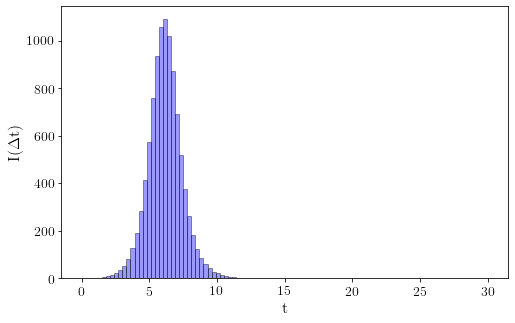

In [8]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm I(\Delta t)$")
plt.bar(TimeDeltaT,IproDeltaT,deltaT, color="blue", alpha=0.4, edgecolor="black");

... und stellen uns in der unteren Abbildung die gesamte Anzahl der bestätigten Infektionen als Funktion der Zeit dar.

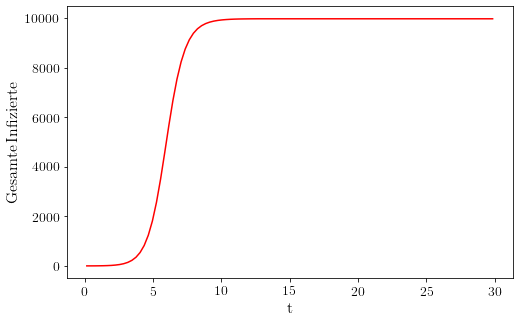

In [9]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm Gesamte\, Infizierte$")
plt.plot(TimeDeltaT,GesamtI,c="red");

Wir tragen nun die absolute Zahl der in einem Zeitabschnitt $\Delta t$ neu infizierten Personen gegen die gesamte Anzahl bestätigter Infektionen auf.

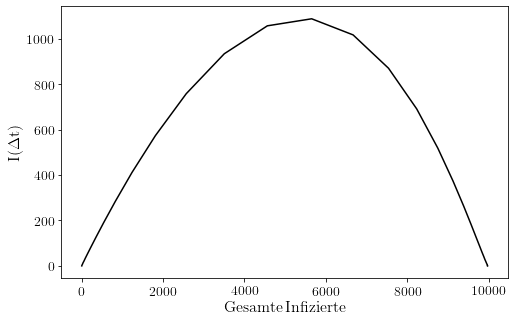

In [10]:
plt.xlabel(r"$\rm Gesamte\, Infizierte$")
plt.ylabel(r"$\rm I(\Delta t)$")
plt.plot(GesamtI,IproDeltaT,c="black");

In der folgenden Animation betrachten wir die Auswirkungen bei Veränderung des Parameters $<\!\!k\!\!>$, wobei wir die weiteren Parameter des Modells unverändert lassen ($\beta=0.2$ und $\mu=0.1$) und die durchschnittliche Anzahl der Kontakte von $<\!\!k\!\!>=3$ kontinuierlich bis $<\!\!k\!\!>=14$ erhöhen.

In [11]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.gridspec as gridspec
params = {
    'figure.figsize'    : [11,4.5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [12]:
N=10000
beta,mu=0.2,0.1
k0=3
k=3
tend=30

npoints=2001
tval = np.linspace(0, tend, npoints)
s0=(N-1)/N
i0=1/N
r0=0
initialval = np.array([s0,i0,r0])

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], wspace=0.35)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

def init():
    Loes = integrate.odeint(DGLsys, initialval, tval)

    ax1.plot(tval, Loes[:, 0],c="blue", label=r"$\rm s(t)$");
    ax1.plot(tval, Loes[:, 1],c="red", label=r"$\rm i(t)$");
    ax1.plot(tval, Loes[:, 2],c="grey", label=r"$\rm r(t)$");
    
    IproDeltaT=[]
    GesamtI=[]
    GI=0
    TimeDeltaT=[]
    ideltaT=10
    deltaT=tval[ideltaT]
    for itime in range(ideltaT,npoints,ideltaT):
        GI=int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])) + GI
        IproDeltaT.append(int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])))
        GesamtI.append(GI)
        TimeDeltaT.append(tval[itime-ideltaT]+deltaT/2)    
    ax3.plot(GesamtI,IproDeltaT,c="black");
    
    ax2.bar(TimeDeltaT,IproDeltaT,deltaT, color="blue", alpha=0.4, edgecolor="black");
    
    ax1.set_xlabel(r"$\rm t$")
    ax1.set_ylabel(r"$\rm s,i,r(t)$")
    ax1.set_xlim(0,tend)
    
    ax3.set_xlabel(r"$\rm Gesamte\, Infizierte$")
    ax3.set_ylabel(r"$\rm I(\Delta t)$")
    ax3.set_ylim(0,1000)
    
    ax2.set_xlabel(r"$\rm t$")
    ax2.set_ylabel(r"$\rm I(\Delta t)$")
    ax2.set_xlim(0,tend)
    ax2.set_ylim(0,1000)
    
    texttitlea=r'$R_0\,=\,$'+str(round(1000*(beta*k/mu))/1000)
    texttitleb=r'$\,:\,\,<\!\!k\!\!>\,=\,$'+str(k)
    texttitle=texttitlea+texttitleb
    ax1.set_title(texttitle)    
    texttitle=r'$\beta\,=\,$'+str(beta)
    ax2.set_title(texttitle)  
    texttitle=r'$\mu\,=\,$'+str(mu)
    ax3.set_title(texttitle)  
    return fig,

def animate(i):
    ax1.cla()
    ax2.cla()
    ax3.cla()
    k=k0+i
    def DGLsys(vx,t):
        s, i, r = vx
        dsdt = DGLs(s,i,r,beta,mu,k)
        didt = DGLi(s,i,r,beta,mu,k)
        drdt = DGLr(s,i,r,beta,mu,k)
        return np.array([dsdt,didt,drdt])
    
    Loes = integrate.odeint(DGLsys, initialval, tval)

    ax1.plot(tval, Loes[:, 0],c="blue", label=r"$\rm s(t)$");
    ax1.plot(tval, Loes[:, 1],c="red", label=r"$\rm i(t)$");
    ax1.plot(tval, Loes[:, 2],c="grey", label=r"$\rm r(t)$");
    
    IproDeltaT = []
    GesamtI = []
    GI=0
    TimeDeltaT = []
    ideltaT=10
    deltaT=tval[ideltaT]
    for itime in range(ideltaT,npoints,ideltaT):
        GI=int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])) + GI
        IproDeltaT.append(int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])))
        GesamtI.append(GI)
        TimeDeltaT.append(tval[itime-ideltaT]+deltaT/2)    
    ax3.plot(GesamtI,IproDeltaT,c="black");
    
    ax2.bar(TimeDeltaT,IproDeltaT,deltaT, color="blue", alpha=0.4, edgecolor="black");
    
    ax1.set_xlabel(r"$\rm t$")
    ax1.set_ylabel(r"$\rm s,i,r(t)$")
    ax1.set_xlim(0,tend)
    
    ax3.set_xlabel(r"$\rm Gesamte\, Infizierte$")
    ax3.set_ylabel(r"$\rm I(\Delta t)$")
    ax3.set_ylim(0,1000)
    
    ax2.set_xlabel(r"$\rm t$")
    ax2.set_ylabel(r"$\rm I(\Delta t)$")
    ax2.set_xlim(0,tend)
    ax2.set_ylim(0,1000)
    
    texttitlea=r'$R_0\,=\,$'+str(round(1000*(beta*k/mu))/1000)
    texttitleb=r'$\,:\,\,<\!\!k\!\!>\,=\,$'+str(k)
    texttitle=texttitlea+texttitleb
    ax1.set_title(texttitle)   
    texttitle=r'$\beta\,=\,$'+str(beta)
    ax2.set_title(texttitle)  
    texttitle=r'$\mu\,=\,$'+str(mu)
    ax3.set_title(texttitle) 
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=12,interval=1500)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Wir betrachten nun die Auswirkungen bei Veränderung des Parameters $\mu$ ($\mu \in [0.1,0.9]$), wobei wir die weiteren Parameter des Modells unverändert lassen ($<\!\!k\!\!>=10$ und $\beta=0.2$).

In [13]:
N=10000
beta=0.2
k=10
mu0=0.1
mu=0.1
tend=20

npoints=2001
tval = np.linspace(0, tend, npoints)
s0=(N-1)/N
i0=1/N
r0=0
initialval = np.array([s0,i0,r0])

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], wspace=0.35)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

def init():
    Loes = integrate.odeint(DGLsys, initialval, tval)

    ax1.plot(tval, Loes[:, 0],c="blue", label=r"$\rm s(t)$");
    ax1.plot(tval, Loes[:, 1],c="red", label=r"$\rm i(t)$");
    ax1.plot(tval, Loes[:, 2],c="grey", label=r"$\rm r(t)$");
    
    IproDeltaT=[]
    GesamtI=[]
    GI=0
    TimeDeltaT=[]
    ideltaT=10
    deltaT=tval[ideltaT]
    for itime in range(ideltaT,npoints,ideltaT):
        GI=int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])) + GI
        IproDeltaT.append(int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])))
        GesamtI.append(GI)
        TimeDeltaT.append(tval[itime-ideltaT]+deltaT/2)    
    ax3.plot(GesamtI,IproDeltaT,c="black");
    
    ax2.bar(TimeDeltaT,IproDeltaT,deltaT, color="blue", alpha=0.4, edgecolor="black");
    
    ax1.set_xlabel(r"$\rm t$")
    ax1.set_ylabel(r"$\rm s,i,r(t)$")
    ax1.set_xlim(0,tend)
    
    ax3.set_xlabel(r"$\rm Gesamte\, Infizierte$")
    ax3.set_ylabel(r"$\rm I(\Delta t)$")
    ax3.set_ylim(0,500)
    ax3.set_xlim(0,N)
    
    ax2.set_xlabel(r"$\rm t$")
    ax2.set_ylabel(r"$\rm I(\Delta t)$")
    ax2.set_xlim(0,tend)
    ax2.set_ylim(0,500)
    
    texttitlea=r'$R_0\,=\,$'+str(round(1000*(beta*k/mu))/1000)
    texttitleb=r'$\,:\,\,<\!\!k\!\!>\,=\,$'+str(k)
    texttitle=texttitlea+texttitleb
    ax1.set_title(texttitle)    
    texttitle=r'$\beta\,=\,$'+str(beta)
    ax2.set_title(texttitle)  
    texttitle=r'$\mu\,=\,$'+str(round(1000*mu)/1000)
    ax3.set_title(texttitle)    
    return fig,

def animate(i):
    ax1.cla()
    ax2.cla()
    ax3.cla()
    mu=mu0+i/10
    def DGLsys(vx,t):
        s, i, r = vx
        dsdt = DGLs(s,i,r,beta,mu,k)
        didt = DGLi(s,i,r,beta,mu,k)
        drdt = DGLr(s,i,r,beta,mu,k)
        return np.array([dsdt,didt,drdt])
    
    Loes = integrate.odeint(DGLsys, initialval, tval)

    ax1.plot(tval, Loes[:, 0],c="blue", label=r"$\rm s(t)$");
    ax1.plot(tval, Loes[:, 1],c="red", label=r"$\rm i(t)$");
    ax1.plot(tval, Loes[:, 2],c="grey", label=r"$\rm r(t)$");
    
    IproDeltaT = []
    GesamtI = []
    GI=0
    TimeDeltaT = []
    ideltaT=10
    deltaT=tval[ideltaT]
    for itime in range(ideltaT,npoints,ideltaT):
        GI=int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])) + GI
        IproDeltaT.append(int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])))
        GesamtI.append(GI)
        TimeDeltaT.append(tval[itime-ideltaT]+deltaT/2)    
    ax3.plot(GesamtI,IproDeltaT,c="black");
    
    ax2.bar(TimeDeltaT,IproDeltaT,deltaT, color="blue", alpha=0.4, edgecolor="black");
    
    ax1.set_xlabel(r"$\rm t$")
    ax1.set_ylabel(r"$\rm s,i,r(t)$")
    ax1.set_xlim(0,tend)
    
    ax3.set_xlabel(r"$\rm Gesamte\, Infizierte$")
    ax3.set_ylabel(r"$\rm I(\Delta t)$")
    ax3.set_ylim(0,500)
    ax3.set_xlim(0,N)
    
    ax2.set_xlabel(r"$\rm t$")
    ax2.set_ylabel(r"$\rm I(\Delta t)$")
    ax2.set_xlim(0,tend)
    ax2.set_ylim(0,500)
    
    texttitlea=r'$R_0\,=\,$'+str(round(1000*(beta*k/mu))/1000)
    texttitleb=r'$\,:\,\,<\!\!k\!\!>\,=\,$'+str(k)
    texttitle=texttitlea+texttitleb
    ax1.set_title(texttitle)    
    texttitle=r'$\beta\,=\,$'+str(beta)
    ax2.set_title(texttitle)  
    texttitle=r'$\mu\,=\,$'+str(round(1000*mu)/1000)
    ax3.set_title(texttitle) 
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=9,interval=1500)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Man erkennt in der oberen Animation, dass ab einer gewissen Größe des Wertes von $\mu$ nicht mehr alle Personen infiziert werden und sich somit das Virus nicht über die gesamte Population verteilen kann (der Wert von r(t) für große Zeiten ist kleiner 1: $r(t \rightarrow \infty)<1$). Wir wollen uns diesen Übergang genauer ansehen und setzen $<\!\!k\!\!>=5$, $\beta=0.1$ und $\mu \in [0.1,0.5]$.

In [14]:
N=10000
beta=0.1
k=5
mu0=0.1
mu=0.1
tend=200

npoints=2001
tval = np.linspace(0, tend, npoints)
s0=(N-1)/N
i0=1/N
r0=0
initialval = np.array([s0,i0,r0])

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], wspace=0.35)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

def init():
    Loes = integrate.odeint(DGLsys, initialval, tval)

    ax1.plot(tval, Loes[:, 0],c="blue", label=r"$\rm s(t)$");
    ax1.plot(tval, Loes[:, 1],c="red", label=r"$\rm i(t)$");
    ax1.plot(tval, Loes[:, 2],c="grey", label=r"$\rm r(t)$");
    
    IproDeltaT=[]
    GesamtI=[]
    GI=0
    TimeDeltaT=[]
    ideltaT=10
    deltaT=tval[ideltaT]
    for itime in range(ideltaT,npoints,ideltaT):
        GI=int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])) + GI
        IproDeltaT.append(int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])))
        GesamtI.append(GI)
        TimeDeltaT.append(tval[itime-ideltaT]+deltaT/2)    
    ax3.plot(GesamtI,IproDeltaT,c="black");
    
    ax2.bar(TimeDeltaT,IproDeltaT,deltaT, color="blue", alpha=0.4, edgecolor="black");
    
    ax1.set_xlabel(r"$\rm t$")
    ax1.set_ylabel(r"$\rm s,i,r(t)$")
    ax1.set_xlim(0,tend)
    
    ax3.set_xlabel(r"$\rm Gesamte\, Infizierte$")
    ax3.set_ylabel(r"$\rm I(\Delta t)$")
    ax3.set_ylim(0,700)
    ax3.set_xlim(0,N)
    
    ax2.set_xlabel(r"$\rm t$")
    ax2.set_ylabel(r"$\rm I(\Delta t)$")
    ax2.set_xlim(0,tend)
    ax2.set_ylim(0,700)
    
    texttitlea=r'$R_0\,=\,$'+str(round(1000*(beta*k/mu))/1000)
    texttitleb=r'$\,:\,\,<\!\!k\!\!>\,=\,$'+str(k)
    texttitle=texttitlea+texttitleb
    ax1.set_title(texttitle)    
    texttitle=r'$\beta\,=\,$'+str(beta)
    ax2.set_title(texttitle)  
    texttitle=r'$\mu\,=\,$'+str(round(1000*mu)/1000)
    ax3.set_title(texttitle)    
    return fig,

def animate(i):
    ax1.cla()
    ax2.cla()
    ax3.cla()
    mu=mu0+i/25
    def DGLsys(vx,t):
        s, i, r = vx
        dsdt = DGLs(s,i,r,beta,mu,k)
        didt = DGLi(s,i,r,beta,mu,k)
        drdt = DGLr(s,i,r,beta,mu,k)
        return np.array([dsdt,didt,drdt])
    
    Loes = integrate.odeint(DGLsys, initialval, tval)

    ax1.plot(tval, Loes[:, 0],c="blue", label=r"$\rm s(t)$");
    ax1.plot(tval, Loes[:, 1],c="red", label=r"$\rm i(t)$");
    ax1.plot(tval, Loes[:, 2],c="grey", label=r"$\rm r(t)$");
    
    IproDeltaT = []
    GesamtI = []
    GI=0
    TimeDeltaT = []
    ideltaT=10
    deltaT=tval[ideltaT]
    for itime in range(ideltaT,npoints,ideltaT):
        GI=int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])) + GI
        IproDeltaT.append(int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])))
        GesamtI.append(GI)
        TimeDeltaT.append(tval[itime-ideltaT]+deltaT/2)    
    ax3.plot(GesamtI,IproDeltaT,c="black");
    
    ax2.bar(TimeDeltaT,IproDeltaT,deltaT, color="blue", alpha=0.4, edgecolor="black");
    
    ax1.set_xlabel(r"$\rm t$")
    ax1.set_ylabel(r"$\rm s,i,r(t)$")
    ax1.set_xlim(0,tend)
    
    ax3.set_xlabel(r"$\rm Gesamte\, Infizierte$")
    ax3.set_ylabel(r"$\rm I(\Delta t)$")
    ax3.set_ylim(0,900)
    ax3.set_xlim(0,N)
    
    ax2.set_xlabel(r"$\rm t$")
    ax2.set_ylabel(r"$\rm I(\Delta t)$")
    ax2.set_xlim(0,tend)
    ax2.set_ylim(0,900)
    
    texttitlea=r'$R_0\,=\,$'+str(round(1000*(beta*k/mu))/1000)
    texttitleb=r'$\,:\,\,<\!\!k\!\!>\,=\,$'+str(k)
    texttitle=texttitlea+texttitleb
    ax1.set_title(texttitle)    
    texttitle=r'$\beta\,=\,$'+str(beta)
    ax2.set_title(texttitle)  
    texttitle=r'$\mu\,=\,$'+str(round(1000*mu)/1000)
    ax3.set_title(texttitle) 
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=11,interval=1500)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die obige Animation zeigt, dass sich das Virus ab einem gewissen Wert von $\mu$ bzw. $R_0$ nicht mehr ungehindert ausbreiten kann und für $R_0<1$ es sogar sofort vollständig ausstirbt. 

Wir betrachten uns nun den Anteil der Personen, die noch keinen Kontakt mit dem Virus hatten ($s(\infty):=s(t \rightarrow \infty)$) und kombinieren dazu die einzelnen Gleichungen des Systems von Differentialgleichungen des SIR-Modells 

$$
\begin{equation}
\frac{\frac{d i(t)}{dt}}{\frac{d s(t)}{dt}} = \frac{d i}{ds}=\frac{\mu}{\beta <\!\!k\!\!>} \cdot \frac{1}{s} - 1 = \frac{1}{R_0 \cdot s} -1 \quad.
\end{equation}
$$
Wir lösen diese Differentialgleichung nun analytisch, wobei wir als Randbedingung den Anfangswert von i zur Zeit t=0 wählen ($i_0:=i(s(t=0))=i(\frac{N-1}{N})=\frac{1}{N}$

In [15]:
from sympy import *
init_printing()

In [16]:
symbolR0,Ss,SN = symbols('R_0,s,N')
Fi = Function('i')(Ss)

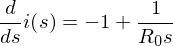

In [17]:
DGL=Eq(Fi.diff(Ss),1/(symbolR0*Ss) -1)
DGL

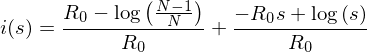

In [18]:
LoesAnalytic=dsolve(DGL,ics={Fi.subs(Ss,(SN-1)/SN):1/SN})
LoesAnalytic

Wir benutzen nun, dass am Ende der Epidemie $i(s(\infty))=0$ ist und lösen die so entstehende Gleichung nach $s(\infty))$ auf. Man erhält:

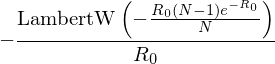

In [19]:
Loes=solve(Eq(LoesAnalytic.rhs,0),Ss)
Loes[0]

Setzt man z.B. $R_0=1.2$ und $N=10000$, so erhält man $s(\infty))=0.6859$. Dies besagt, dass am Ende der Epidemie ca. 69% der Population nicht infiziert wurden.

In [20]:
N(Loes[0].subs(symbolR0,1.2).subs(SN,10000))

Wir stellen uns im Folgenden die analytische Lösung $i(s)$ für drei unterschiedliche $R_0$-Werte dar ($R_0=3,2,1.3$).

In [21]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
params = {
    'figure.figsize'    : [8,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [22]:
LoesAnalyticSetPara1=LoesAnalytic.rhs.subs(symbolR0,1.3).subs(SN,10000)
LoesAnalyticSetPara2=LoesAnalytic.rhs.subs(symbolR0,2).subs(SN,10000)
LoesAnalyticSetPara3=LoesAnalytic.rhs.subs(symbolR0,3).subs(SN,10000)

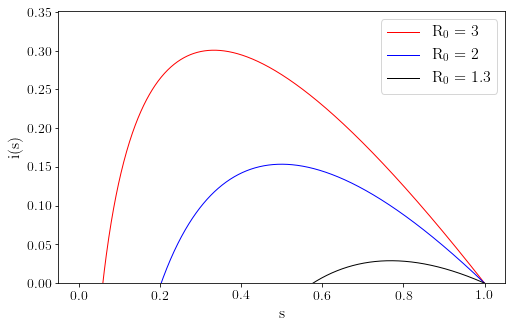

In [23]:
sval = np.linspace(1/10000,(10000-1)/10000, 1000)
func1 = lambdify(Ss, LoesAnalyticSetPara1)
func2 = lambdify(Ss, LoesAnalyticSetPara2)
func3 = lambdify(Ss, LoesAnalyticSetPara3)
plt.plot(sval,func3(sval),color='red', linewidth=1, linestyle='-', label=r"$\rm R_0=3$")
plt.plot(sval,func2(sval),color='blue', linewidth=1, linestyle='-', label=r"$\rm R_0=2$")
plt.plot(sval,func1(sval),color='black', linewidth=1, linestyle='-', label=r"$\rm R_0=1.3$")
plt.xlabel(r"$\rm s$")
plt.ylabel(r"$\rm i(s)$");
plt.ylim(0,max(func3(sval))+0.05)
plt.legend(loc='upper right',fontsize=16);

Wir nehmen im Folgenden an, dass die durchschnittliche Anzahl der Kontakte der Individuen aufgrund eines "Lock Downs" in einem gewissen Zeitbereich von $t_1$ bis $t_2$ (hier speziell $t_1=3.5$ bis $t_2=10$) von $<\!\!k\!\!>=20$ auf $<\!\!k\!\!>=3$ reduziert wird und danach einen Wert von $<\!\!k\!\!>=10$ annimmt.

In [24]:
from scipy import integrate
del(symbolR0,Ss,SN,Fi)
def DGLsys1(vx,t,k1,k2,k3,t1,t2):
    s, i, r = vx
    if t<=t1:
        k=k1
    if t>t1 and t<t2:
        k=k2
    if t>=t2:
        k=k3
    dsdt = DGLs(s,i,r,beta,mu,k)
    didt = DGLi(s,i,r,beta,mu,k)
    drdt = DGLr(s,i,r,beta,mu,k)
    return np.array([dsdt,didt,drdt])

In [25]:
N=10000
beta,mu,k1,k2,k3,t1,t2=0.1,0.2,20,3,10,3.5,10

tval = np.linspace(0, 25, 1001)
s0=(N-1)/N
i0=1/N
r0=0
initialval = np.array([s0,i0,r0])
Loes = integrate.odeint(DGLsys1, initialval, tval,args=(k1,k2,k3,t1,t2))

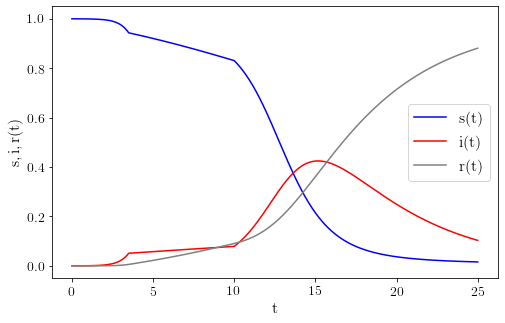

In [26]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm s,i,r(t)$")
plt.plot(tval, Loes[:, 0],c="blue", label=r"$\rm s(t)$");
plt.plot(tval, Loes[:, 1],c="red", label=r"$\rm i(t)$");
plt.plot(tval, Loes[:, 2],c="grey", label=r"$\rm r(t)$");
plt.legend(loc='center right',fontsize=16);

Wir stellen uns im Folgenden die absolute Zahl der in einem Zeitabschnitt $\Delta t$ neu infizierten Personen als Funktion der Zeit dar.

In [27]:
IproDeltaT = []
GesamtI = []
GI=0
TimeDeltaT = []
ideltaT=10
deltaT=tval[ideltaT]
for itime in range(ideltaT,1001,ideltaT):
    GI=int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])) + GI
    IproDeltaT.append(int(N*(Loes[itime-ideltaT, 0]-Loes[itime, 0])))
    GesamtI.append(GI)
    TimeDeltaT.append(tval[itime-ideltaT]+deltaT/2)

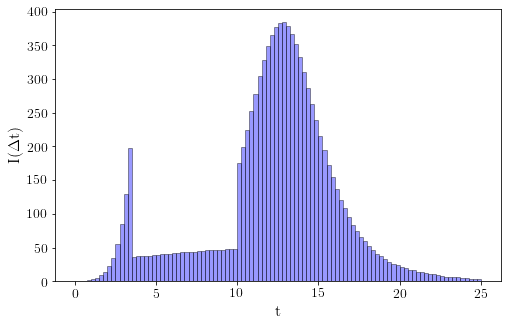

In [28]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm I(\Delta t)$")
plt.bar(TimeDeltaT,IproDeltaT,deltaT, color="blue", alpha=0.4, edgecolor="black");

Gesamte Anzahl der bestätigten Infektionen als Funktion der Zeit:

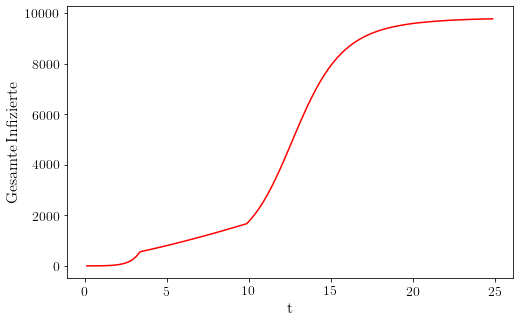

In [29]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm Gesamte\, Infizierte$")
plt.plot(TimeDeltaT,GesamtI,c="red");

Wir tragen wieder die absolute Zahl der in einem Zeitabschnitt $\Delta t$ neu infizierten Personen gegen die gesamte Anzahl bestätigter Infektionen auf.

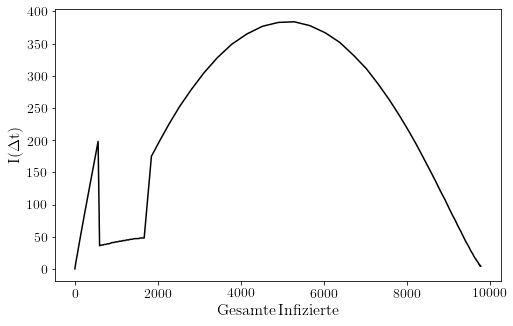

In [30]:
plt.xlabel(r"$\rm Gesamte\, Infizierte$")
plt.ylabel(r"$\rm I(\Delta t)$")
plt.plot(GesamtI,IproDeltaT,c="black");

Den wirklichen epidemischen Verlauf des COVID Virus in den einzelnen Ländern kann man sich z.B. auf den folgenden Internetseiten betrachten:

<A href="https://coronavirus.jhu.edu/map.html" target=blank> Johns Hopkins University</A>

<A href="https://experience.arcgis.com/experience/478220a4c454480e823b17327b2bf1d4" target=blank>Robert Koch-Institut: COVID-19-Dashboard</A>

<A href="https://itp.uni-frankfurt.de/covid-19/" target=blank>Goethe Interactive COVID-19 Analyzer</A>